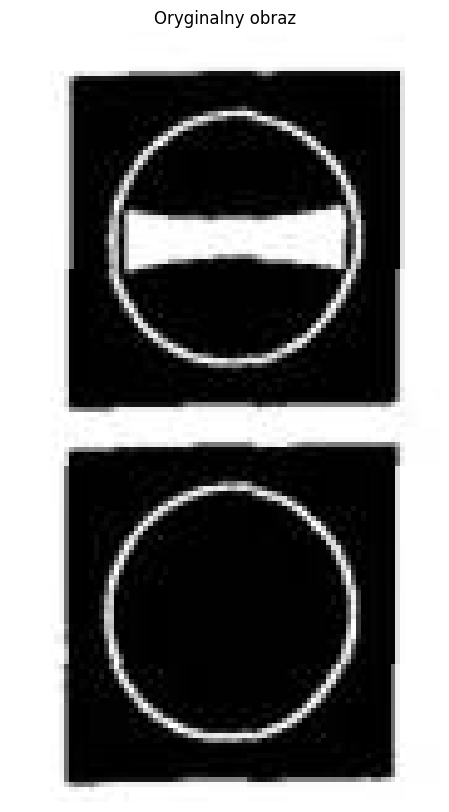

In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = 'scheme001.jpg'  
image = cv2.imread(image_path)

if image is None:
    raise FileNotFoundError(f"Obraz nie został znaleziony w ścieżce: {image_path}")


plt.figure(figsize=(10, 10))
plt.title('Oryginalny obraz')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


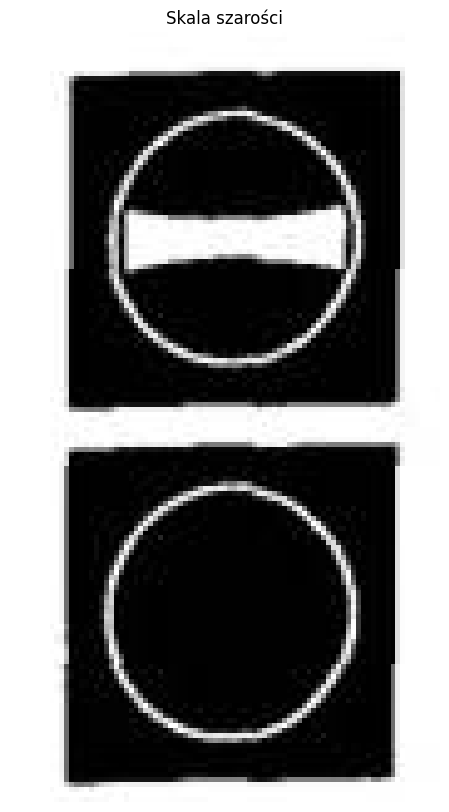

In [2]:


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 10))
plt.title('Skala szarości')
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()


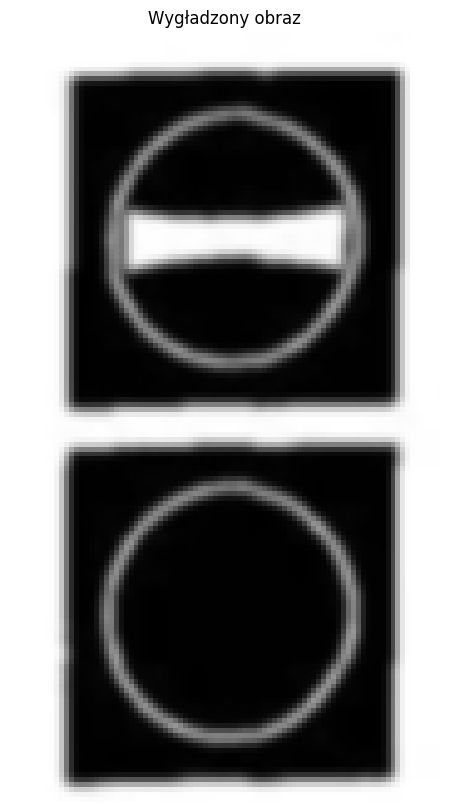

In [3]:


filtered = cv2.GaussianBlur(gray, (5, 5), 0)
plt.figure(figsize=(10, 10))
plt.title('Wygładzony obraz')
plt.imshow(filtered, cmap='gray')
plt.axis('off')
plt.show()


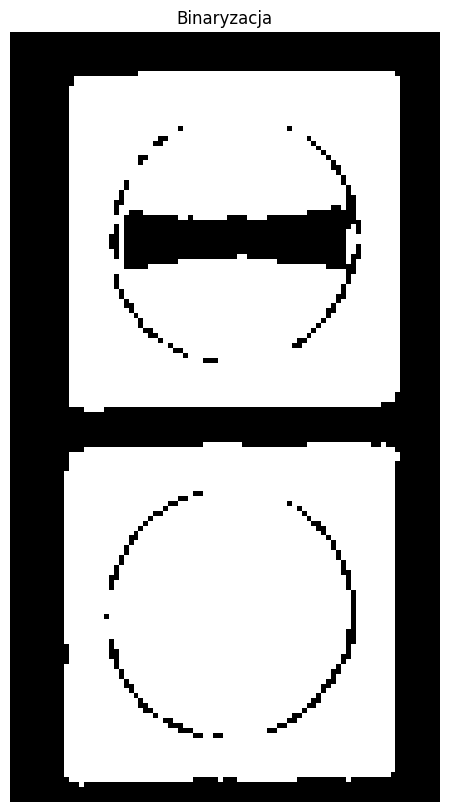

In [4]:


_, binary = cv2.threshold(filtered, 127, 255, cv2.THRESH_BINARY_INV)
plt.figure(figsize=(10, 10))
plt.title('Binaryzacja')
plt.imshow(binary, cmap='gray')
plt.axis('off')
plt.show()


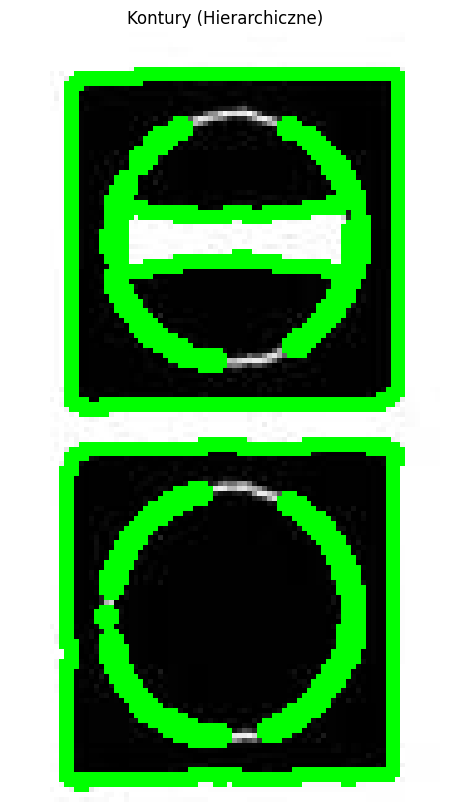

Hierarchy: [[[39 -1  1 -1]
  [ 2 -1 -1  0]
  [ 3  1 -1  0]
  [ 4  2 -1  0]
  [ 5  3 -1  0]
  [ 6  4 -1  0]
  [ 7  5 -1  0]
  [ 8  6 -1  0]
  [ 9  7 -1  0]
  [10  8 -1  0]
  [11  9 -1  0]
  [12 10 -1  0]
  [13 11 -1  0]
  [14 12 -1  0]
  [15 13 -1  0]
  [16 14 -1  0]
  [17 15 -1  0]
  [18 16 -1  0]
  [19 17 -1  0]
  [20 18 -1  0]
  [21 19 -1  0]
  [22 20 -1  0]
  [23 21 -1  0]
  [24 22 -1  0]
  [25 23 -1  0]
  [26 24 -1  0]
  [27 25 -1  0]
  [28 26 -1  0]
  [29 27 -1  0]
  [30 28 -1  0]
  [31 29 -1  0]
  [32 30 -1  0]
  [33 31 -1  0]
  [34 32 -1  0]
  [35 33 -1  0]
  [36 34 -1  0]
  [37 35 -1  0]
  [38 36 -1  0]
  [-1 37 -1  0]
  [-1  0 40 -1]
  [41 -1 -1 39]
  [42 40 -1 39]
  [43 41 -1 39]
  [44 42 -1 39]
  [45 43 -1 39]
  [46 44 -1 39]
  [47 45 -1 39]
  [48 46 -1 39]
  [49 47 -1 39]
  [50 48 -1 39]
  [51 49 -1 39]
  [52 50 -1 39]
  [53 51 -1 39]
  [54 52 -1 39]
  [55 53 -1 39]
  [56 54 -1 39]
  [57 55 -1 39]
  [58 56 -1 39]
  [59 57 -1 39]
  [60 58 -1 39]
  [61 59 -1 39]
  [62 60 -1 3

In [5]:


contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contour_image = np.copy(image)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
plt.figure(figsize=(10, 10))
plt.title('Kontury (Hierarchiczne)')
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


print("Hierarchy:", hierarchy)


In [6]:


"""approx_image = np.copy(image)
for contour in contours:
    epsilon = 0.01 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    # Identify shapes based on the number of vertices
    vertices = len(approx)
    shape = "Nieznany"
    if vertices == 3:
        shape = "Trójkąt"
    elif vertices == 4:
        x, y, w, h = cv2.boundingRect(approx)
        if abs(w - h) <= 3:
            shape = "Kwadrat"
        else:
            aspect_ratio = w / float(h)
            if aspect_ratio > 1:
                shape = "Kreska pozioma"  # Pozioma kreska
            else:
                shape = "Kreska pionowa"  # Pionowa kreska
    elif vertices > 4:
        (x, y), (MA, ma), angle = cv2.fitEllipse(contour)
        aspect_ratio = MA / ma
        if abs(aspect_ratio - 1) < 0.1:
            shape = "Okrąg"
        else:
            shape = "Elipsa"
    
    # Draw the approximated contour and the shape name
    cv2.drawContours(approx_image, [approx], -1, (0, 255, 0), 2)
    x, y = approx[0][0]
    cv2.putText(approx_image, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.title('Aproksymacja konturów i identyfikacja kształtów')
plt.imshow(cv2.cvtColor(approx_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
"""

'approx_image = np.copy(image)\nfor contour in contours:\n    epsilon = 0.01 * cv2.arcLength(contour, True)\n    approx = cv2.approxPolyDP(contour, epsilon, True)\n    \n    # Identify shapes based on the number of vertices\n    vertices = len(approx)\n    shape = "Nieznany"\n    if vertices == 3:\n        shape = "Trójkąt"\n    elif vertices == 4:\n        x, y, w, h = cv2.boundingRect(approx)\n        if abs(w - h) <= 3:\n            shape = "Kwadrat"\n        else:\n            aspect_ratio = w / float(h)\n            if aspect_ratio > 1:\n                shape = "Kreska pozioma"  # Pozioma kreska\n            else:\n                shape = "Kreska pionowa"  # Pionowa kreska\n    elif vertices > 4:\n        (x, y), (MA, ma), angle = cv2.fitEllipse(contour)\n        aspect_ratio = MA / ma\n        if abs(aspect_ratio - 1) < 0.1:\n            shape = "Okrąg"\n        else:\n            shape = "Elipsa"\n    \n    # Draw the approximated contour and the shape name\n    cv2.drawContours